<a href="https://colab.research.google.com/github/teejaz/AITensorFlow/blob/master/CADLLecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import utils
import numpy as np
plt.style.use('ggplot')

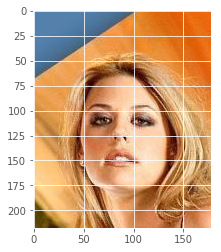

In [34]:
files = utils.get_celeb_files()
img = plt.imread(files[50])
imgs = utils.get_celeb_imgs()
plt.imshow(imgs[0])

In [19]:
data = np.array(imgs)
data.shape

(100, 218, 178, 3)

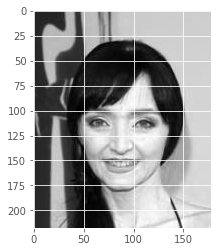

In [23]:
plt.imshow(img[:, :, 0], cmap='gray')

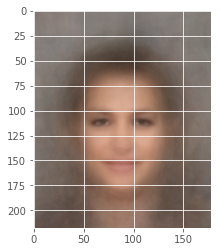

In [24]:
mean_img = np.mean(data, axis =0)
plt.imshow(mean_img.astype(np.uint8))

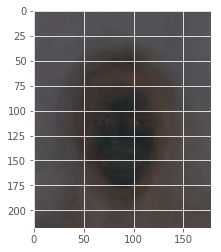

In [25]:
std_img = np.std(data,axis =0)
plt.imshow(std_img.astype(np.uint8))

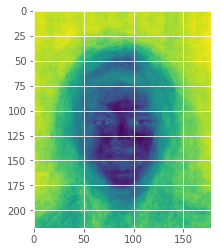

In [26]:
plt.imshow(np.mean(std_img,axis =2).astype(np.uint8))

In [27]:
flattened = data.ravel()
print(data[:1])
print(flattened[:10])

[[[[ 84 129 171]
   [ 84 129 171]
   [ 84 129 171]
   ...
   [237 101  15]
   [230 100  12]
   [230 100  12]]

  [[ 84 129 171]
   [ 84 129 171]
   [ 84 129 171]
   ...
   [239 103  17]
   [232 102  14]
   [232 102  14]]

  [[ 84 129 171]
   [ 84 129 171]
   [ 84 129 171]
   ...
   [241 105  19]
   [233 103  15]
   [233 103  15]]

  ...

  [[ 99  83   8]
   [ 98  81   9]
   [ 97  79  13]
   ...
   [255 190 153]
   [249 196 152]
   [249 196 152]]

  [[ 99  83   8]
   [100  83  11]
   [100  83  14]
   ...
   [251 183 148]
   [248 197 154]
   [248 197 154]]

  [[ 99  83   6]
   [100  83  11]
   [101  82  14]
   ...
   [249 183 148]
   [248 197 154]
   [248 197 154]]]]
[ 84 129 171  84 129 171  84 129 171  84]


(array([216804., 117821.,  99125.,  71049.,  66478.,  62066.,  62528.,
         58085.,  56686.,  56114.,  56848.,  58551.,  63168.,  61086.,
         59193.,  59305.,  62526.,  63596.,  62285.,  65061.,  63389.,
         61989.,  61411.,  60742.,  60464.,  60307.,  59074.,  59312.,
         60353.,  64807.,  67305.,  61667.,  59906.,  60546.,  62017.,
         62268.,  63030.,  62799.,  62396.,  62609.,  59541.,  58918.,
         57822.,  61451.,  63481.,  57782.,  57212.,  56516.,  56039.,
         58385.,  56252.,  55089.,  54677.,  52066.,  51012.,  48826.,
         47602.,  46064.,  45351.,  43735.,  42849.,  42903.,  42571.,
         41789.,  42412.,  42705.,  42982.,  43107.,  43372.,  43416.,
         43323.,  42808.,  42253.,  42302.,  42008.,  41846.,  42800.,
         42476.,  42435.,  42405.,  42584.,  42612.,  42671.,  42344.,
         42610.,  42023.,  42214.,  41700.,  41302.,  41160.,  41885.,
         42650.,  41703.,  42498.,  41983.,  42702.,  42735.,  43540.,
      

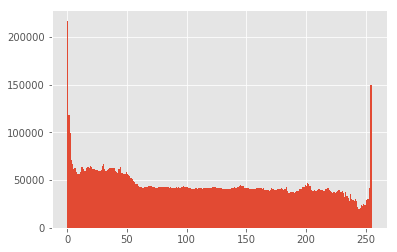

In [28]:
plt.hist(flattened.ravel(), 255)

(array([   2.,    0.,    0.,    0.,    2.,   18.,   30.,   23.,   42.,
          42.,   43.,   41.,   51.,   48.,   30.,   52.,   58.,   59.,
          67.,   67.,   71.,   83.,   94.,  110.,  110.,  107.,  134.,
         103.,  109.,  160.,  198.,  206.,  211.,  265.,  306.,  289.,
         344.,  335.,  361.,  382.,  402.,  390.,  400.,  497.,  544.,
         594.,  663.,  679.,  749.,  803.,  847.,  882.,  886.,  938.,
         817.,  857.,  801.,  825.,  831.,  896.,  875.,  861.,  843.,
         870.,  842.,  897.,  863.,  861.,  906.,  939.,  905.,  935.,
         946.,  972., 1004., 1064., 1079., 1124., 1162., 1103., 1129.,
        1108., 1085., 1079., 1051., 1155., 1068., 1093., 1170., 1171.,
        1146., 1213., 1146., 1174., 1211., 1229., 1173., 1196., 1216.,
        1150., 1255., 1373., 1344., 1445., 1554., 1554., 1553., 1478.,
        1506., 1469., 1546., 1626., 1659., 1568., 1548., 1559., 1576.,
        1376., 1283., 1189., 1151., 1093., 1046., 1068., 1021., 1059.,
      

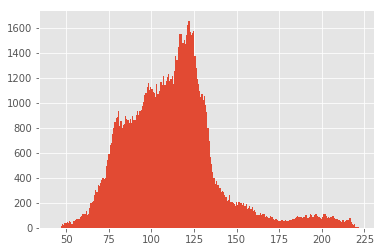

In [29]:
plt.hist(mean_img.ravel(), 255)

Text(0.5, 1.0, '(img - mean) distribution')

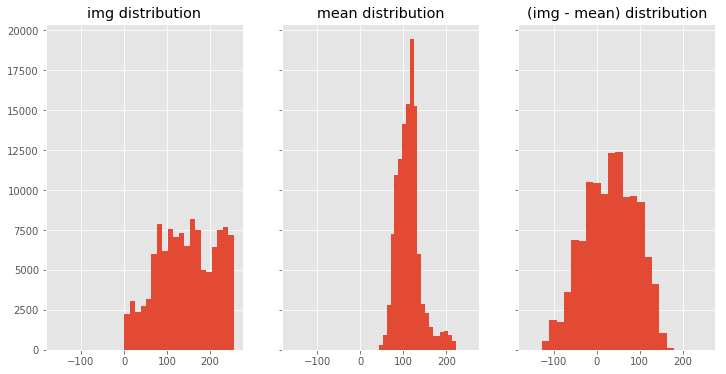

In [35]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

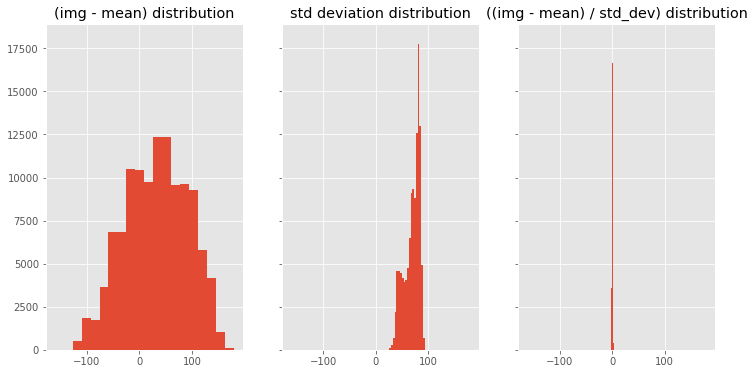

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

In [39]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [40]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [43]:
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

In [44]:
g.get_tensor_by_name('LinSpace' + ':0')

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

In [45]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -0.99999994 -0.9393939  -0.8787878
 -0.81818175 -0.7575757  -0.6969696  -0.63636357 -0.5757575  -0.51515144
 -0.45454538 -0.39393932 -0.33333325 -0.2727272  -0.21212113 -0.15151507
 -0.090909   -0.03030294  0.03030312  0.09090918  0.15151525  0.21212131
  0.27272737  0.33333343  0.3939395   0.45454556  0.5151516   0.5757577
  0.63636374  0.6969698   0.75757587  0.81818193  0.878788    0.93939406
  1.0000001   1.0606062   1.1212122   1.1818182   1.2424244   1.3030305
  1.3636365   1.4242425   1.4848486   1.5454547   1.6060607   1.6666667
  1.7272729   1.787879    1.848485    1.909091    1.9696971  

In [0]:
sess = tf.Session(graph=g)
sess.close()

In [63]:
g2 = tf.Graph()
#created Graph

sess = tf.InteractiveSession()
x.eval()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


array([-3.        , -2.939394  , -2.878788  , -2.8181818 , -2.7575758 ,
       -2.6969697 , -2.6363635 , -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.3333333 , -2.2727273 , -2.2121212 , -2.151515  ,
       -2.090909  , -2.030303  , -1.969697  , -1.9090909 , -1.8484848 ,
       -1.7878788 , -1.7272727 , -1.6666666 , -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.4242424 , -1.3636363 , -1.3030303 , -1.2424242 ,
       -1.1818181 , -1.121212  , -1.060606  , -0.99999994, -0.9393939 ,
       -0.8787878 , -0.81818175, -0.7575757 , -0.6969696 , -0.63636357,
       -0.5757575 , -0.51515144, -0.45454538, -0.39393932, -0.33333325,
       -0.2727272 , -0.21212113, -0.15151507, -0.090909  , -0.03030294,
        0.03030312,  0.09090918,  0.15151525,  0.21212131,  0.27272737,
        0.33333343,  0.3939395 ,  0.45454556,  0.5151516 ,  0.5757577 ,
        0.63636374,  0.6969698 ,  0.75757587,  0.81818193,  0.878788  ,
        0.93939406,  1.0000001 ,  1.0606062 ,  1.1212122 ,  1.18

In [64]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


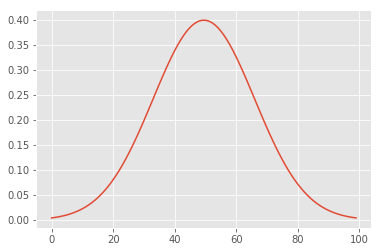

In [66]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

res = z.eval()

plt.plot(res)

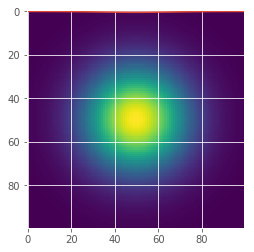

In [67]:

# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
%matplotlib inline
plt.plot(res)
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

(512, 512)


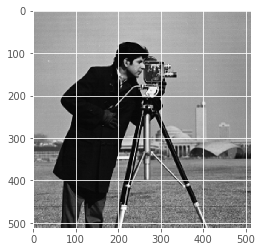

In [68]:
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

In [69]:
# We could use the numpy reshape function to reshape our numpy array
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])
print(img_4d.shape)

# but since we'll be using tensorflow, we can use the tensorflow reshape function:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)

(1, 512, 512, 1)
Tensor("Reshape_6:0", shape=(1, 512, 512, 1), dtype=float32)


In [70]:
print(img_4d.get_shape())
print(img_4d.get_shape().as_list())

(1, 512, 512, 1)
[1, 512, 512, 1]


In [71]:
# Reshape the 2d kernel to tensorflow's required 4d format: H x W x I x O
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


In [72]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 512, 512, 1)


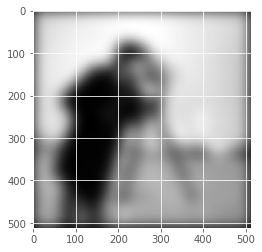

In [73]:
# Matplotlib cannot handle plotting 4D images!  We'll have to convert this back to the original shape.  There are a few ways we could do this.  We could plot by "squeezing" the singleton dimensions.
plt.imshow(np.squeeze(res), cmap='gray')

# Or we could specify the exact dimensions we want to visualize:
plt.imshow(res[0, :, :, 0], cmap='gray')

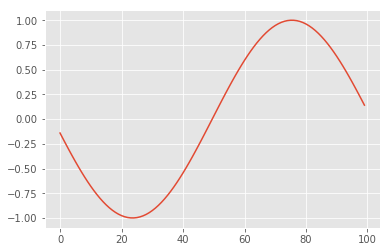

In [75]:
xs = tf.linspace(-3.0, 3.0, ksize)
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

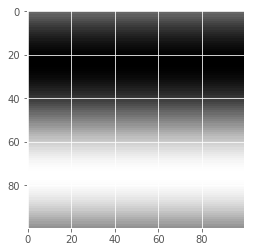

In [77]:
ys = tf.reshape(ys, [ksize, 1])
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

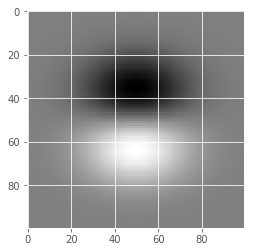

In [78]:
gabor = tf.multiply(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

In [0]:
# This is a placeholder which will become part of the tensorflow graph, but
# which we have to later explicitly define whenever we run/evaluate the graph.
# Pretty much everything you do in tensorflow can have a name.  If we don't
# specify the name, tensorflow will give a default one, like "Placeholder_0".
# Let's use a more useful name to help us understand what's happening.
img = tf.placeholder(tf.float32, shape=[None, None], name='img')


# We'll reshape the 2d image to a 3-d tensor just like before:
# Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# We use it to reshape our H x W image to include a channel dimension of 1
# our new dimensions will end up being: H x W x 1
img_3d = tf.expand_dims(img, 2)
dims = img_3d.get_shape()
print(dims)

# And again to get: 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

# Let's create another set of placeholders for our Gabor's parameters:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.stack([ksize, 1])),
  tf.reshape(z, tf.stack([1, ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.stack([ksize, 1]))
ones = tf.ones(tf.stack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 1, 1]))

# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

In [80]:
# This is a placeholder which will become part of the tensorflow graph, but
# which we have to later explicitly define whenever we run/evaluate the graph.
# Pretty much everything you do in tensorflow can have a name.  If we don't
# specify the name, tensorflow will give a default one, like "Placeholder_0".
# Let's use a more useful name to help us understand what's happening.
img = tf.placeholder(tf.float32, shape=[None, None], name='img')


# We'll reshape the 2d image to a 3-d tensor just like before:
# Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# We use it to reshape our H x W image to include a channel dimension of 1
# our new dimensions will end up being: H x W x 1
img_3d = tf.expand_dims(img, 2)
dims = img_3d.get_shape()
print(dims)

# And again to get: 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

# Let's create another set of placeholders for our Gabor's parameters:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.stack([ksize, 1])),
  tf.reshape(z, tf.stack([1, ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.stack([ksize, 1]))
ones = tf.ones(tf.stack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 1, 1]))

# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

(?, ?, 1)
[1, None, None, 1]


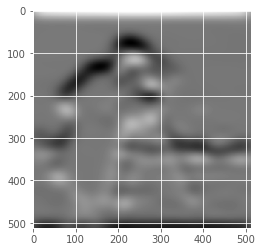

In [82]:

res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

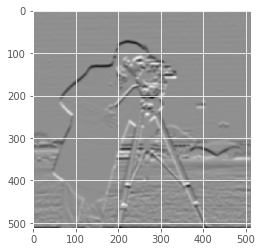

In [83]:
res = convolved_img.eval(feed_dict={
    img: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')